In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from sklearn.cluster import KMeans
import nltk 
import csv

In [2]:
data = pd.read_csv("/Users/timothycolledge/Desktop/Compsci/Project 3/simpleAnalysis/Musical_instruments_reviews.csv", index_col=False)

In [3]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(data.reviewText[:300])

In [4]:
display = tokenizer.texts_to_matrix(data.reviewText[:300], mode='freq')

In [10]:
nldata= []
with open("/Users/timothycolledge/Desktop/Compsci/Project 3/simpleAnalysis/Musical_instruments_reviews.csv", mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        nldata.append(nltk.word_tokenize(row["reviewText"]))


In [6]:
nlCountData = []
nlKmeansData = {}
for x in range (len(nldata)):  
    nlcountData = {}
    for nam in nldata[x]:  
        if nam not in nlcountData:
            nlcountData.update({nam: 0})
            nlKmeansData.update({x: 0})
    nlCountData.append(nlcountData)

In [7]:
for x in range (len(nldata)):  
    for nam in nldata[x]: 
        nlCountData[x][nam] += 1

for x in range (len(nldata)):  
    for nam in nldata[x]: 
        nlKmeansData[x] = nlCountData[x][nam]



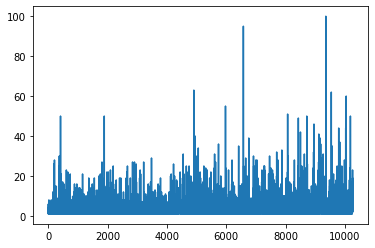

In [8]:
nlfinalData = sorted(nlKmeansData.items())
x,y = zip(*nlfinalData)
plt.plot(x,y)
plt.show()

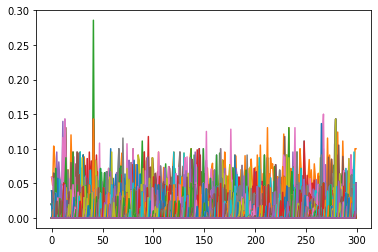

In [11]:
plt.plot(display)
plt.show()

In [ ]:
print(data.head(10))
print(data.reviewText[:10])
print(f'ListOfWords: {list(tokenizer.word_index.keys())}')
print(tokenizer.word_index)

In [12]:
countData = pd.DataFrame(nlfinalData)
clusters = KMeans(n_clusters=5)
clusters.fit(countData)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = countData.index.values
cluster_map['cluster'] = clusters.labels_

3600816187.005308
   data_index  cluster
0           0        2
1           1        2
2           2        2
3           3        2
4           4        2


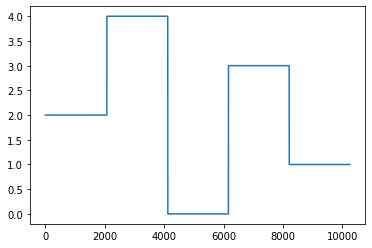

In [13]:
print(clusters.inertia_)
print(cluster_map.head())
plt.plot(cluster_map.data_index,cluster_map.cluster)
plt.show()

In [14]:
countData = pd.DataFrame(display)
clusters = KMeans(n_clusters=5)
clusters.fit(countData)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = countData.index.values
cluster_map['cluster'] = clusters.labels_

7.548414831141326
   data_index  cluster
0           0        2
1           1        2
2           2        3
3           3        3
4           4        4


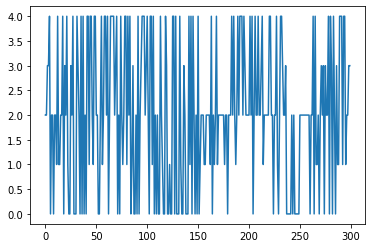

In [15]:
print(clusters.inertia_)
print(cluster_map.head())
plt.plot(cluster_map.data_index,cluster_map.cluster)
plt.show()